* * *
<pre> NYU Paris            <i> Artificial intelligence - Fall 2022 </i></pre>
* * *


<h1 align="center"> Lab 10: Anomaly detection  </h1>

<pre align="left"> November 3rd 2022               <i> Author: Hicham Janati </i></pre>
* * *



Several methods in machine learning can be used to detect fraud or anticipate system failures. While this is a standard -- but very unbalanced -- binary classification problem, it is very hard to find annotated data to perform supervised learning. Moreover, failures are by definition outliers of the general distribution of the data: It may not make any sense to try to "characterize" their distribution specially if new types of anomalies appear. For this reason, we focus in this lab on unsupervised methods for anomaly detection - also called novelty detection.

# Part I: Probability density estimation

In [2]:
%matplotlib inline

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

Consider the following random variable following a Gaussian (i.e normal) distribution with mean 0 and variance 1.

$$ X\sim \mathcal{N}(0, 1)$$

Its theoretical probability density function is given by:

$$f(x) = \frac{1}{\sqrt{2\pi} }\exp(-\frac{x^2}{2}) $$


### Question 1
In the first lab, we have seen how histograms can approximate probability density functions. Generate 1000 samples from the Gaussian distribution and visualize the histogram on 10 figures with an increasing number of bins. The density function should be overlayed on top to evaluate the quality of the histogram. 

### Question 2

Histograms approximate the density by counting the number of samples falling in a bin, regardless of where the sample falls withing that bin. To better approximate the density, one can instead count the samples but with a given weight: samples falling in the center of the bin should count more than samples on the edges of the same bin. This weighting can be decided by a Kernel function: enters the Kernel density estimator.

Compare (graphically) the density estimaton of KDE to that of a histogram. 


_Hints:
The Kernel density object can be fitted on some data X (n_samples, dimension):
`kde.fit(X)`
then evaluated on some points to obtain the logarithm of the density funciton values: `kde.score_samples(X_eval)`_
(i.e the log-likelihood).

In [23]:
from sklearn.neighbors import KernelDensity
kde = KernelDensity(kernel='gaussian')

### Question 3
Contiminate the samples by adding very large values. How did their kde score change ? How can this log-likelihood score be used to detect outliers ?

### Question 4
We are now ready to move on to a 2-dimension setting. We generate some data:

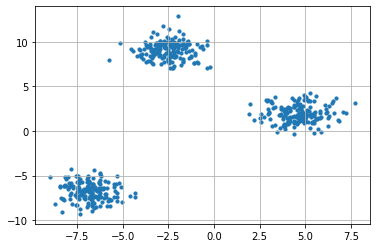

In [25]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_features=2, centers=3, n_samples=500,
                  random_state=42)

plt.figure()
plt.scatter(X[:, 0], X[:, 1], s=10)
plt.grid()
plt.show()

The function `plot_logdensity` displays the density estimation contours.

In [50]:
def get_2d_grid(X):
    n_samples, n_features = X.shape
    X_range = np.zeros((n_features, 2))
    X_range[:, 0] = np.min(X, axis=0) - 1.
    X_range[:, 1] = np.max(X, axis=0) + 1.

    h = 0.1  # échelle de la grille
    x_min, x_max = X_range[0]
    y_min, y_max = X_range[1]
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_logdensity(kde, X):
    xx, yy = get_2d_grid(X)
    grid = np.c_[xx.ravel(), yy.ravel()]
    scores = kde.score_samples(grid).reshape(xx.shape)
    plt.figure()
    plt.contourf(xx, yy, scores, cmap=plt.cm.Blues_r) # on trace les level sets de oneclass svm
    plt.scatter(X[:, 0], X[:, 1], s=5)
    plt.show()

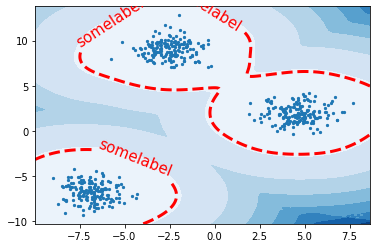

In [49]:
## figure left here for "spiking curiosity purposes"

We can visualize a specific contour of the density by providing a `levels` argument in `plt.contour`. Using this  code below.

In [ ]:
c_0 = plt.contour(xx, yy, scores, levels=[somevalue], colors='red', linewidths=3)
## add a label to this specific contour
plt.clabel(c_0, inline=1, fontsize=15, fmt={somevalue: "somelabel"})

The mquantiles function returns the value of the quantile q of some empirical distribution. Use `mquantiles` to decide an outlier threshold value and display its contour using the code above by adding it to `plot_logdensity` function. How does the contour change with the chose value ? 

# Part 2: OneClass SVM

The SVM intuition can be used for novelty detection even for unsupervised learning. The idea is to find a separation in a higher dimensional space that contains most of the data. Intuitively, using a Gaussian kernel for example, we are looking for the smallest hypersphere  that contains the data. This minimization with the flexibility of allowing some samples (outliers) to be out of the sphere, leads to an outlier detection model.

In [ ]:
from sklearn.svm import OneClassSVM
nu = 0.05  # regularization parameter controlling the max proportion of expected outliers
ocsvm = OneClassSVM(kernel='rbf', gamma=0.05, nu=nu) 



###  Question 5

Draw the frontier (separation) of the oneclass svm using `ocsvm.decision_function`. Use the predict function to get outliers detected by OCSVM and visualize them on top. 

In [ ]:
X_outliers = 

### Question 6
Run the following cell. What can we say about the support vectors of the OCSVM ?



In [ ]:
X_SV = X[ocsvm.support_] 
n_SV = len(X_SV)

n_outliers = len(X_outliers)
print(n_outliers)


### Question 7

What is the expected effect of the choice of `nu` ? `gamma`? Visualize the separation and the detected outliers in a large 2d plt.subplots where each parameter is modified along one of the subplots axes. 